In [0]:
from google.colab import files
files=files.upload()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
haberman=pd.read_csv('haberman.csv')

In [4]:
haberman #This data table consists of 306 row and 4 column

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


<h2>General Observation:</h2>

There is 306 row consists of 4 columns(features and class)', : **age**,**year**,**nodes**,**status**<br>
**age** is containing that at what age they undergo for operation(feature).<br>**year** is representing as which year they undergo for operation.(feature)<br>**Nodes** represents axillary lymph nodes.Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52).(feature)<br>**Status** represents that weather a patient survive 5 years or more than 5 years else less than 5 years.(class)  


**Maximum** and **Minimum** age of the patient

In [5]:
max_age=np.max(haberman['age'])
min_age=np.min(haberman['age'])
print('minimum age-{}, maximum age-{}'.format(min_age,max_age))

minimum age-30, maximum age-83


**Count** of *patient* survive status

In [6]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**Maximum** and **Minimum** nodes cell

In [7]:
max_node=np.max(haberman['nodes'])
min_node=np.min(haberman['nodes'])
print('minimum cell-{}, maximum cell-{}'.format(min_node,max_node))

minimum cell-0, maximum cell-52


**Observation:**<br>
1.We can see that *225* patient out of 306 will survive 5 or more than 5 years.<br>
2.*81* patient will survive less than 5 years.

<h1>Bi-variate analysis</h1>

<h2>2D scatter plot</h2>

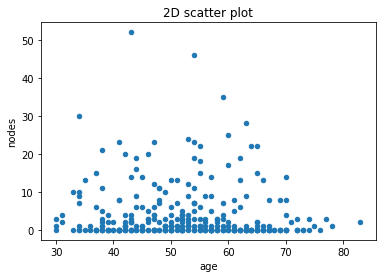

In [8]:
haberman.plot(kind='scatter',x='age',y='nodes')
plt.title('2D scatter plot')
plt.show()

<h2>Observation:</h2>
1.As we can see that,in plot X axis is containing age of the patient and Y axis is containing nodes cell.<br>2.We are not able to distinguish the elements present in the plot.It is overlaping,and all elements are in same color for that we can use seaborn plot to distinguish the data among them with different color. 

<h2>2D scatter plot with seaborn</h2>

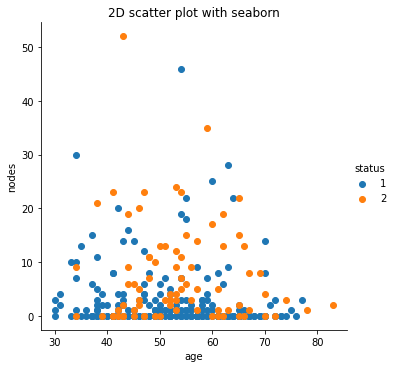

In [9]:
sns.FacetGrid(haberman,hue='status',height=5).map(plt.scatter,'age','nodes').add_legend()
plt.title('2D scatter plot with seaborn')
plt.show()

<h2>Observation:</h2>
1.Above plot is based on age(X axis) and nodes(Y axis),and the blue color is representing patient who survive 5 years or more and the orange color is representing patient who survive less than 5 years.<br>
2.The data is overlaping.The data is not separable with a line.We can say that  for 0-10 nodes patient survive more and less as well.But the ratio of less survival is less than the more survival.

Which axis or feature will give a good knowledge about data we can analyse through pairplot.

<h2>Pair plot</h2>

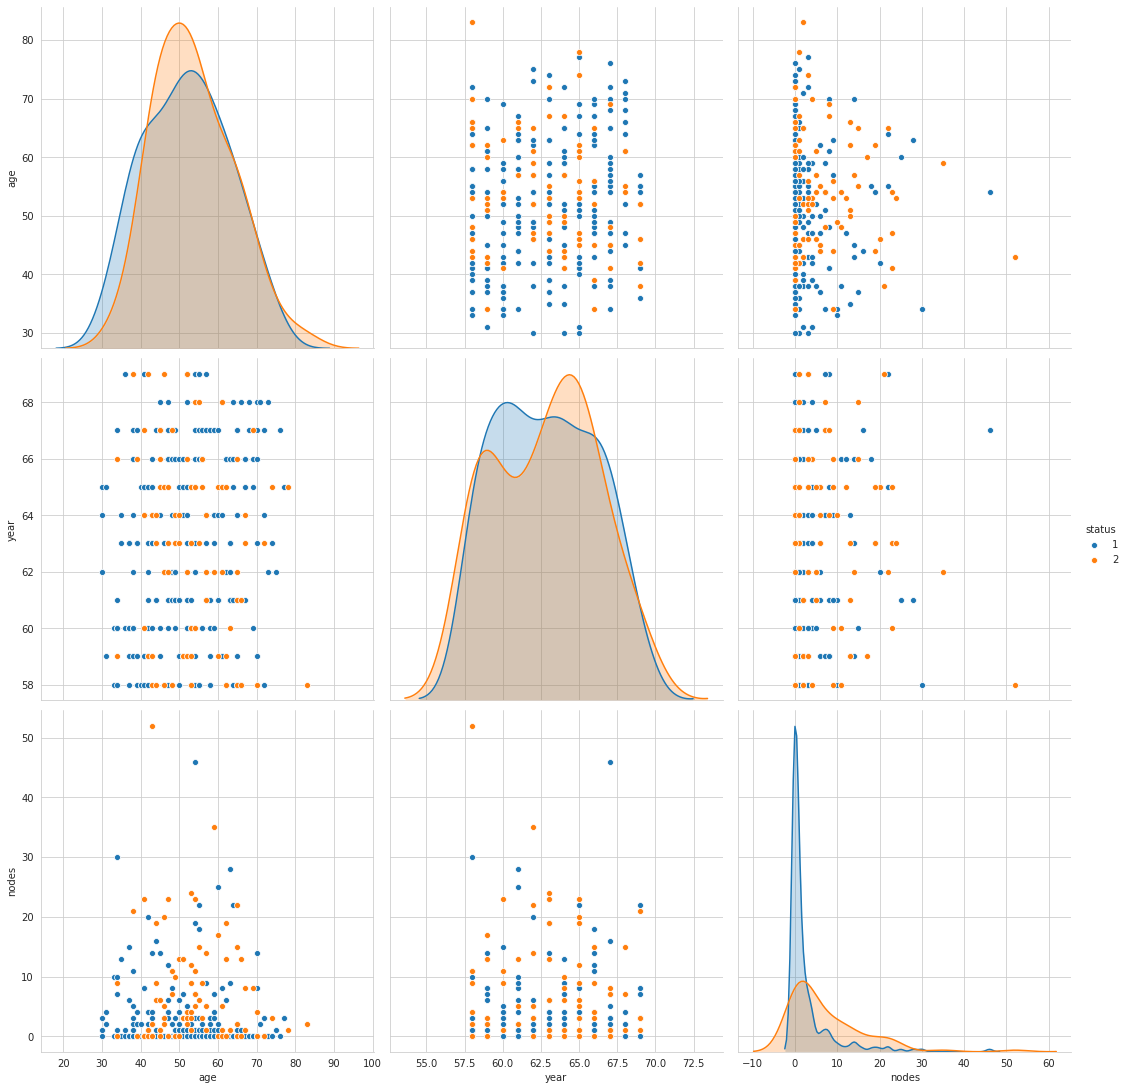

In [10]:
sns.set_style('whitegrid')
sns.pairplot(haberman,hue='status',height=5)
plt.show()

<h2>Observation:</h2>
1.Pair plot is used to plot a 2D graph with different pair of axis(features) at a time.<br>
2.Except 3rd and 7th graph remaining graphs are overlaping the data.Thus they are unuseful data.<br>
3.3rd and 7th graph are same with the vise versa axis.<br>
4.And we already saw in 2D scatter plot with this two axis. 


To go deep into the data and there usefulness we can check there univariate analysis

<h1>Univariate</h1>

<h2>1D scatter plot</h2>

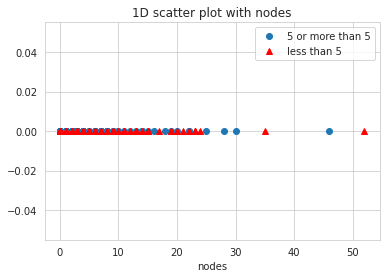

In [11]:
more_than_5=haberman.loc[haberman['status']==1]
less_than_5=haberman.loc[haberman['status']==2]
plt.title('1D scatter plot with nodes')
plt.plot(more_than_5['nodes'],np.zeros_like(more_than_5['nodes']),'o',label='5 or more than 5')
plt.plot(less_than_5['nodes'],np.zeros_like(less_than_5['nodes']),'r^',label='less than 5')
plt.xlabel('nodes')
plt.legend()
plt.show()

<h2>Observation:</h2>
1.It is not possible to separate the data as it is overlaping blue and orange with each other.<br>
2.But we can say that most of patient from both status lie with in 0-30. 

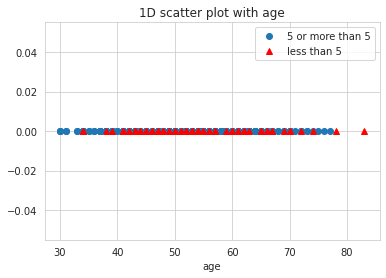

In [12]:
more_than_5=haberman.loc[haberman['status']==1]
less_than_5=haberman.loc[haberman['status']==2]
plt.title('1D scatter plot with age')
plt.plot(more_than_5['age'],np.zeros_like(more_than_5['age']),'o',label='5 or more than 5')
plt.plot(less_than_5['age'],np.zeros_like(less_than_5['age']),'r^',label='less than 5')
plt.xlabel('age')
plt.legend()
plt.show()

<h2>Observation:</h2>
1.This plot is not useful.

<h2>Histogram and PDF</h2>

In [0]:
sns.FacetGrid(haberman,hue='status',height=5).map(sns.distplot,'nodes').add_legend()
plt.title('Histogram and PDF with nodes')
plt.show()

<h2>Observation:</h2>
1.In above plot it is overlaping the blue histogram and orange histogram.<br>
2.But we can say that more patient with 0-1 nodes,survive status is almost 53% where less survive status is nearly 13%.More than 1 nodes that causes less survival status.As we can see from the plot that from 2 onwards its showing percentage of less survival status is more.<br>
3.And the PDF(curve) above the histogram says that the nodes are mosr of the patient(approx 30%) has nodes 0.

In [0]:
sns.FacetGrid(haberman,hue='status',height=5).map(sns.distplot,'age').add_legend()
plt.title('Histogram and PDF with age')
plt.show()

<h2>Observation:</h2>
1.In above PDF, we can say that age of 30-40 years patient has the survival status more but from 35 to 75 there is almost equality between short and long survival.

<h2>CDF</h2>

It's a cumulative sum of PDF.

In [0]:
count,bin_edges=np.histogram(more_than_5['nodes'],bins=10,density=True)
print(bin_edges)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.title('CDF for more survival status')
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.xlabel('nodes')
plt.legend()
plt.show()

<h2>Observation:</h2>

1.From the above plot blue line is saying that approx. 83% of patient has 5 or more than 5 years survival status.On other side with more than 40 nodes patients have survival status of 5 or more than 5 years is 1%.<br>
2.Orange line is saying that greater than 33 node's patients' have 100% of less than 5 years of survival status.

In [0]:
count,bin_edges=np.histogram(less_than_5['nodes'],bins=10,density=True)
print(bin_edges)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.title('CDF for less survival status')
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.xlabel('nodes')
plt.legend()
plt.show()

<h2>Observation:</h2>
Here we can say that nearly 58% of patient has less than 5 years survival status who have less than 5 nodes ans above 40 nodes less survival status is approx. 100%.

<h2>Box plot</h2>

In [0]:
sns.set_style('whitegrid')
sns.boxplot(x='status',y='nodes',data=haberman)
plt.title('Box plot')
plt.show()

<h2>Obsevation:</h2>
1.In above box plot we can say that  25th percentile and 50th percentile are nearly same for more survival status and the threshold is 0-7.<br>
2.For less survival status,50th percentile of nodes are nearly same as 75th percentile of more survival status .Heres the 50% error can be occure for both status.<br>
3.The threshold value for less survival status is 0-25.25th percentile is 0-1 and 50th percentile is 0-6 and 75th percentile is 0-12th nodes.

<h2>Violin plot</h2>

In [0]:
sns.violinplot(x='status',y='nodes',data=haberman)
plt.title('Violin plot')
plt.show()

<h2>Observation:</h2>
1.Here we can see the spread of data(can say PDF).<br>
2.And inside the plot the black middle is representing the box plot.As we didn't see the 50th percentile line in more survival status,here we can see the white dot which is representing 50th percentile of more survival status and remaining all data analyses are same as box plot. 